In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.optimize
from google.colab import files
from autograd import jacobian

warnings.filterwarnings(action='ignore')

eps = 0.001
alpha = np.random.random()
beta = np.random.random()
delta = np.random.normal(0, 1, 100)
x_k = np.arange(0, 1, 0.01)
y_ = [alpha * x_k[k] + beta for k in range(len(x_k))]
y_k = [alpha * x_k[i] + beta + delta[i] for i in range(len(x_k))]


In [ ]:
def linear_approximate(x, a, b):
    return a * x + b

def rational_approximate(x, a, b):
    return a / (1 + b * x)

def least_squares(x, func):
    amount = 0
    for i in range(100):
        amount += np.power(func(x_k[i], x[0], x[1]) - y_k[i], 2)
    return amount

def gradient_descent(func, args):
    return scipy.optimize.minimize(
        func,
        x0=(0, 0),
        method='BFGS',
        args=(args,),
        tol=eps)

def conjugate_gradient_descent(func, args):
    return scipy.optimize.minimize(
        func,
        x0=(0, 0),
        method='CG',
        args=(args,),
        tol=eps)

def newton_method(func, args):
    return scipy.optimize.minimize(
        func,
        x0=(0, 0),
        method='Newton-CG',
        args=(args,),
        jac=jacobian(func),
        tol=eps)

def lev_marq_method(func, x, y):
    return scipy.optimize.curve_fit(
        func,
        xdata=x,
        ydata=y,
        method='lm',
        full_output=True)

Generative line
alpha = 0.5065149185727891, beta = 0.17575572662878447


Linear approximate
Gradient descent arguments: 0.574446, 0.140243
Number of iterations: 2,
Number of function evaluations: 15

Conjugate gradient descent arguments: 0.574446, 0.140243
Number of iterations: 2,
Number of function evaluations: 15

Newtons Method arguments: 0.574446, 0.140242
Number of iterations: 3,
Number of function evaluations: 4

Levenberg-Marquardt arguments: 0.574446, 0.140242
Number of iterations: 2,
Number of function evaluations: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

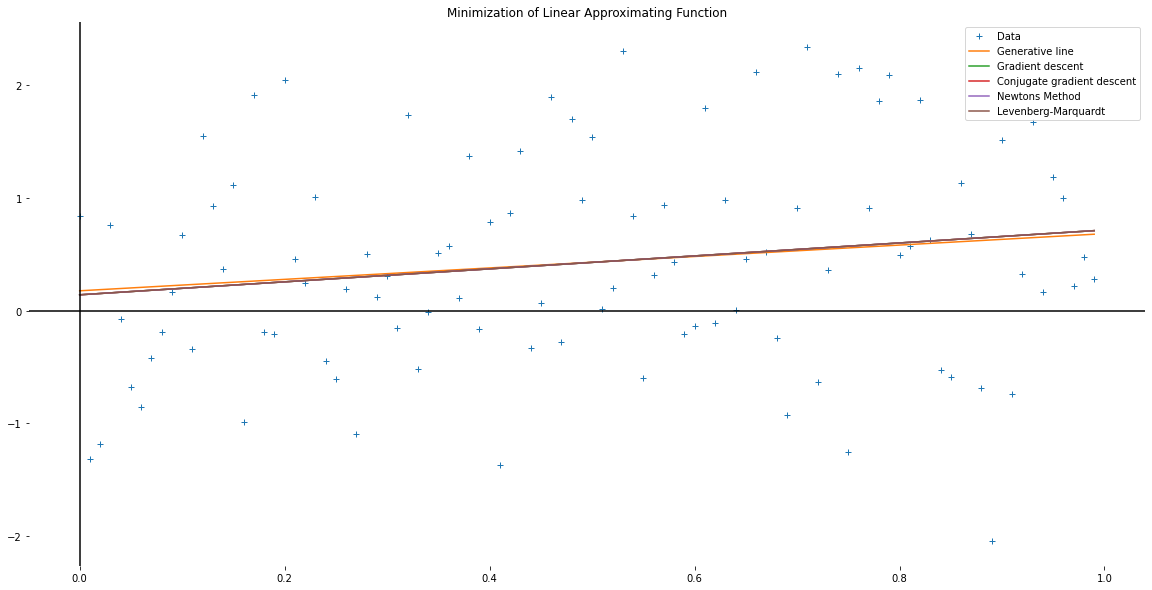

In [ ]:
print('Generative line')
print(f'alpha = {alpha}, beta = {beta}')
print('\n')
print('Linear approximate')
gradient_lower, gradient_higher = gradient_descent(least_squares, linear_approximate).x
gradient_iter_num = gradient_descent(least_squares, linear_approximate).nit
gradient_fev_num = gradient_descent(least_squares, linear_approximate).nfev
print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))
print(f'Number of iterations: {gradient_iter_num},'
      f'\nNumber of function evaluations: {gradient_fev_num}'
      f'\n')
conjugate_lower, conjugate_higher = conjugate_gradient_descent(least_squares, linear_approximate).x
conjugate_iter_num = conjugate_gradient_descent(least_squares, linear_approximate).nit
conjugate_fev_num = conjugate_gradient_descent(least_squares, linear_approximate).nfev
print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))
print(f'Number of iterations: {conjugate_iter_num},'
      f'\nNumber of function evaluations: {conjugate_fev_num}'
      f'\n')
newton_lower, newton_higher = newton_method(least_squares, linear_approximate).x
newton_iter_num = newton_method(least_squares, linear_approximate).nit
newton_fev_num = newton_method(least_squares, linear_approximate).nfev
print('Newtons Method arguments: {:.6f}, {:.6f}'.format(newton_lower, newton_higher))
print(f'Number of iterations: {newton_iter_num},'
      f'\nNumber of function evaluations: {newton_fev_num}'
      f'\n')
lev_marq_lower, lev_marq_higher = lev_marq_method(linear_approximate, x_k, y_k)[0]
lev_marq_iter_num = len(lev_marq_method(rational_approximate, x_k, y_k)[2]["fjac"])
lev_marq_fev_num = lev_marq_method(linear_approximate, x_k, y_k)[2]['nfev']
print('Levenberg-Marquardt arguments: {:.6f}, {:.6f}'.format(lev_marq_lower, lev_marq_higher))
print(f'Number of iterations: {lev_marq_iter_num},'
      f'\nNumber of function evaluations: {lev_marq_fev_num}')

plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y_grad = [linear_approximate(x, gradient_lower, gradient_higher) for x in x_k]
y_conjugate = [linear_approximate(x, conjugate_lower, conjugate_higher) for x in x_k]
y_newton = [linear_approximate(x, newton_lower, newton_higher) for x in x_k]
y_lev_marq = [linear_approximate(x, lev_marq_lower, lev_marq_higher) for x in x_k]

plt.plot(x_k, y_, label='Generative line')
plt.plot(x_k, y_grad, label='Gradient descent')
plt.plot(x_k, y_conjugate, label='Conjugate gradient descent')
plt.plot(x_k, y_newton, label='Newtons Method')
plt.plot(x_k, y_lev_marq, label='Levenberg-Marquardt')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Linear Approximating Function')
ax.legend()

plt.savefig('linear_approx_task3.png', dpi = 200, bbox_inches="tight")
files.download('linear_approx_task3.png')

Rational approximate
Gradient descent arguments: 0.299763, -0.547475
Number of iterations: 9,
Number of function evaluations: 39

Conjugate gradient descent arguments: 0.299748, -0.547520
Number of iterations: 8,
Number of function evaluations: 72

Newtons Method arguments: 0.299762, -0.547481
Number of iterations: 7,
Number of function evaluations: 13

Levenberg-Marquardt arguments: 0.299730, -0.547577
Number of iterations: 2,
Number of function evaluations: 63


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

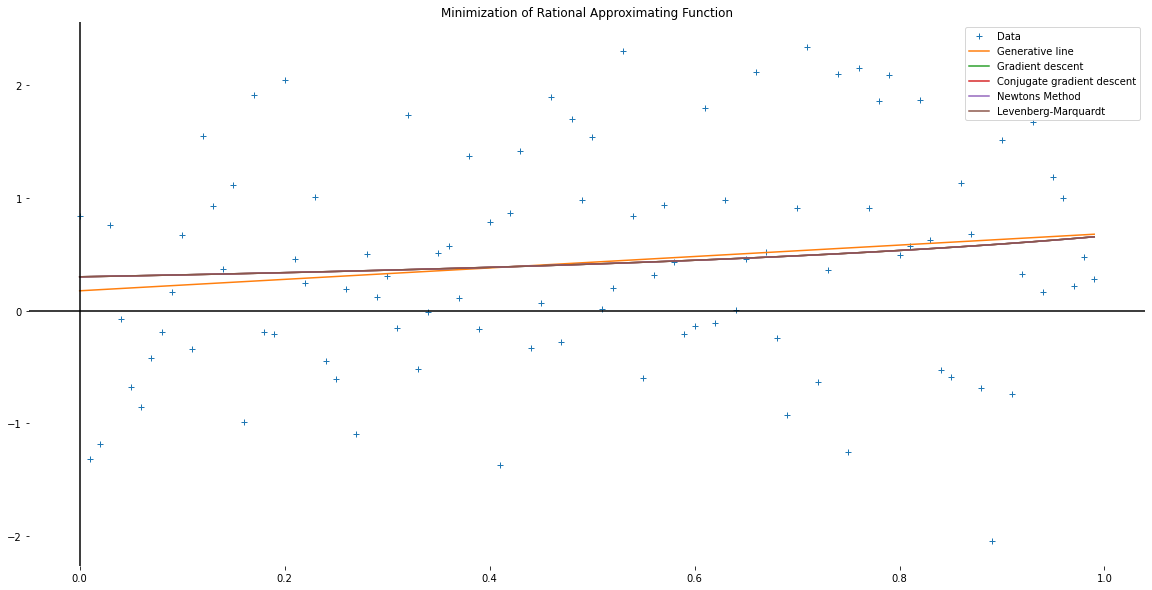

In [ ]:
print('Rational approximate')
gradient_lower, gradient_higher = gradient_descent(least_squares, rational_approximate).x
gradient_iter_num = gradient_descent(least_squares, rational_approximate).nit
gradient_fev_num = gradient_descent(least_squares, rational_approximate).nfev
print('Gradient descent arguments: {:.6f}, {:.6f}'.format(gradient_lower, gradient_higher))
print(f'Number of iterations: {gradient_iter_num},'
      f'\nNumber of function evaluations: {gradient_fev_num}'
      f'\n')
conjugate_lower, conjugate_higher = conjugate_gradient_descent(least_squares, rational_approximate).x
conjugate_iter_num = conjugate_gradient_descent(least_squares, rational_approximate).nit
conjugate_fev_num = conjugate_gradient_descent(least_squares, rational_approximate).nfev
print('Conjugate gradient descent arguments: {:.6f}, {:.6f}'.format(conjugate_lower, conjugate_higher))
print(f'Number of iterations: {conjugate_iter_num},'
      f'\nNumber of function evaluations: {conjugate_fev_num}'
      f'\n')
newton_lower, newton_higher = newton_method(least_squares, rational_approximate).x
newton_iter_num = newton_method(least_squares, rational_approximate).nit
newton_fev_num = newton_method(least_squares, rational_approximate).nfev
print('Newtons Method arguments: {:.6f}, {:.6f}'.format(newton_lower, newton_higher))
print(f'Number of iterations: {newton_iter_num},'
      f'\nNumber of function evaluations: {newton_fev_num}'
      f'\n')
lev_marq_lower, lev_marq_higher = lev_marq_method(rational_approximate, x_k, y_k)[0]
lev_marq_iter_num = len(lev_marq_method(rational_approximate, x_k, y_k)[2]["fjac"])
lev_marq_fev_num = lev_marq_method(rational_approximate, x_k, y_k)[2]['nfev']
print('Levenberg-Marquardt arguments: {:.6f}, {:.6f}'.format(lev_marq_lower, lev_marq_higher))
print(f'Number of iterations: {lev_marq_iter_num},'
      f'\nNumber of function evaluations: {lev_marq_fev_num}')

plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y_grad = [rational_approximate(x, gradient_lower, gradient_higher) for x in x_k]
y_conjugate = [rational_approximate(x, conjugate_lower, conjugate_higher) for x in x_k]
y_newton = [rational_approximate(x, newton_lower, newton_higher) for x in x_k]
y_lev_marq = [rational_approximate(x, lev_marq_lower, lev_marq_higher) for x in x_k]

plt.plot(x_k, y_, label='Generative line')
plt.plot(x_k, y_grad, label='Gradient descent')
plt.plot(x_k, y_conjugate, label='Conjugate gradient descent')
plt.plot(x_k, y_newton, label='Newtons Method')
plt.plot(x_k, y_lev_marq, label='Levenberg-Marquardt')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()
plt.savefig('rational_approx_task3.png', dpi = 200, bbox_inches="tight")
files.download('rational_approx_task3.png')

In [ ]:
def brute_force_search(function, args):
    return scipy.optimize.brute(
        function,
        ranges=(slice(0, 1, eps), (slice(0, 1, eps))),
        args=(args,),
        full_output=True
    )
  

def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='CG',
        args=(args,)
    )

def neldermead_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,)
    )


In [ ]:
print('Linear approximate of methods from Task #2')
a_b_array, func_value, point_amount_lin, value_amount  = brute_force_search(least_squares, linear_approximate)
exhaustive_lower, exhaustive_higher = a_b_array[0], a_b_array[1]
num = 0
for i in range(len(value_amount)):
    num += len(value_amount[i])
print('Brute force search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))
print(f'Number of iterations: {num}')
print(f'Number of function evaluations: {num}')
print('\n')

gauss_lower, gauss_higher = gauss_search(least_squares, linear_approximate).x
gauss_num_iter_lin = gauss_search(least_squares, linear_approximate).nit
gauss_func_ev_lin = gauss_search(least_squares, linear_approximate).nfev
print('Gauss search arguments: {:.3f}, {:.3f}'.format(gauss_lower, gauss_higher))
print(f'Number of iterations: {gauss_num_iter_lin}')
print(f'Number of function evaluations: {gauss_func_ev_lin}')
print('\n')

neldermead_lower, neldermead_higher = neldermead_search(least_squares, linear_approximate).x
neldermead_num_iter_lin = neldermead_search(least_squares, linear_approximate).nit
neldermead_func_ev_lin = neldermead_search(least_squares, linear_approximate).nfev
print('Nelder-Mead search arguments: {:.3f}, {:.3f}'.format(neldermead_lower, neldermead_higher))
print(f'Number of iterations: {neldermead_num_iter_lin}')
print(f'Number of function evaluations: {neldermead_func_ev_lin}')


Linear approximate of methods from Task #2
Brute force search arguments: 0.574, 0.140
Number of iterations: 1000000
Number of function evaluations: 1000000


Gauss search arguments: 0.574, 0.140
Number of iterations: 2
Number of function evaluations: 15


Nelder-Mead search arguments: 0.574, 0.140
Number of iterations: 66
Number of function evaluations: 127


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

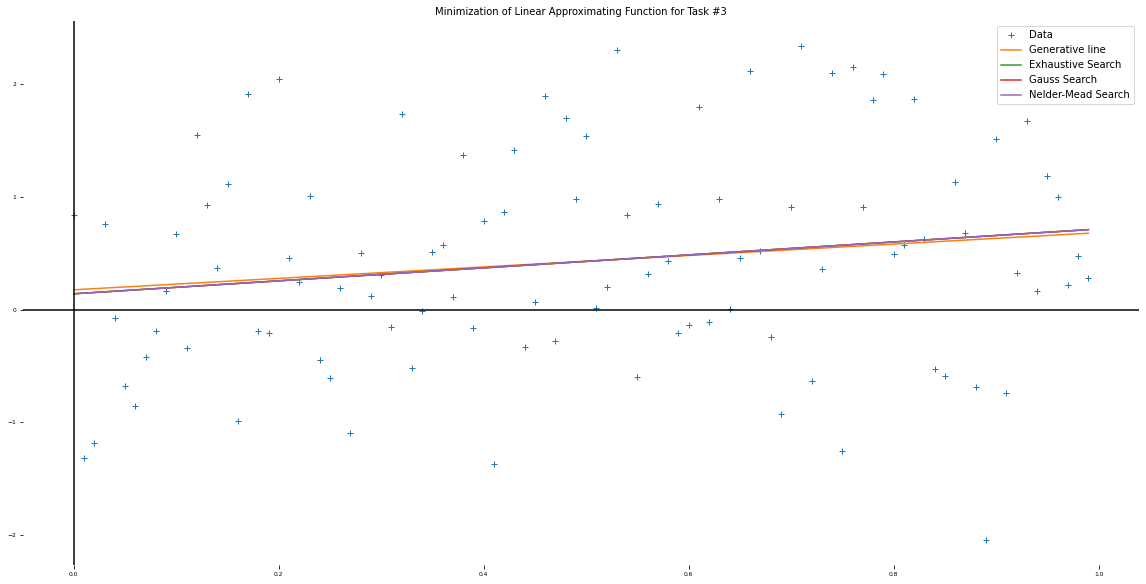

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

plt.plot(x_k, y_, label='Generative line')

y = [linear_approximate(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [linear_approximate(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [linear_approximate(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Minimization of Linear Approximating Function for Task #3', fontsize=10, loc='center')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()

plt.savefig('linear_approx_task2_for_task3.png', dpi = 200, bbox_inches="tight")
files.download('linear_approx_task2_for_task3.png')


In [ ]:
print('\n\nRational approximate of methods from Task #2')
a_b_array_r, func_value_r, point_amount_lin_r, value_amount_r  = brute_force_search(least_squares, rational_approximate)
exhaustive_lower, exhaustive_higher = a_b_array_r[0], a_b_array_r[1]
sum_r = 0
for i in range(len(value_amount_r)):
    sum_r += len(value_amount_r[i])
print('Brute force search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))
print(f'Number of iterations: {sum_r}')
print(f'Number of function evaluations: {sum_r}')
print('\n')

gauss_lower, gauss_higher = gauss_search(least_squares, rational_approximate).x
gauss_num_iter = gauss_search(least_squares, rational_approximate).nit
gauss_func_ev =gauss_search(least_squares, rational_approximate).nfev
print('Gauss search arguments: {:.6f}, {:.6f}'.format(gauss_lower, gauss_higher))
print(f'Number of iterations: {gauss_num_iter}')
print(f'Number of function evaluations: {gauss_func_ev}')
print('\n')

neldermead_lower, neldermead_higher = neldermead_search(least_squares, rational_approximate).x
neldermead_num_iter = neldermead_search(least_squares, rational_approximate).nit
neldermead_func_ev = neldermead_search(least_squares, rational_approximate).nfev
print('Nelder-Mead search arguments: {:.6f}, {:.6f}'.format(neldermead_lower, neldermead_higher))
print(f'Number of iterations: {neldermead_num_iter}')
print(f'Number of function evaluations: {neldermead_func_ev}')




Rational approximate of methods from Task #2
Brute force search arguments: 0.300, -0.547
Number of iterations: 1000000
Number of function evaluations: 1000000


Gauss search arguments: 0.299763, -0.547477
Number of iterations: 14
Number of function evaluations: 102


Nelder-Mead search arguments: 0.424563, 0.000000
Number of iterations: 40
Number of function evaluations: 64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

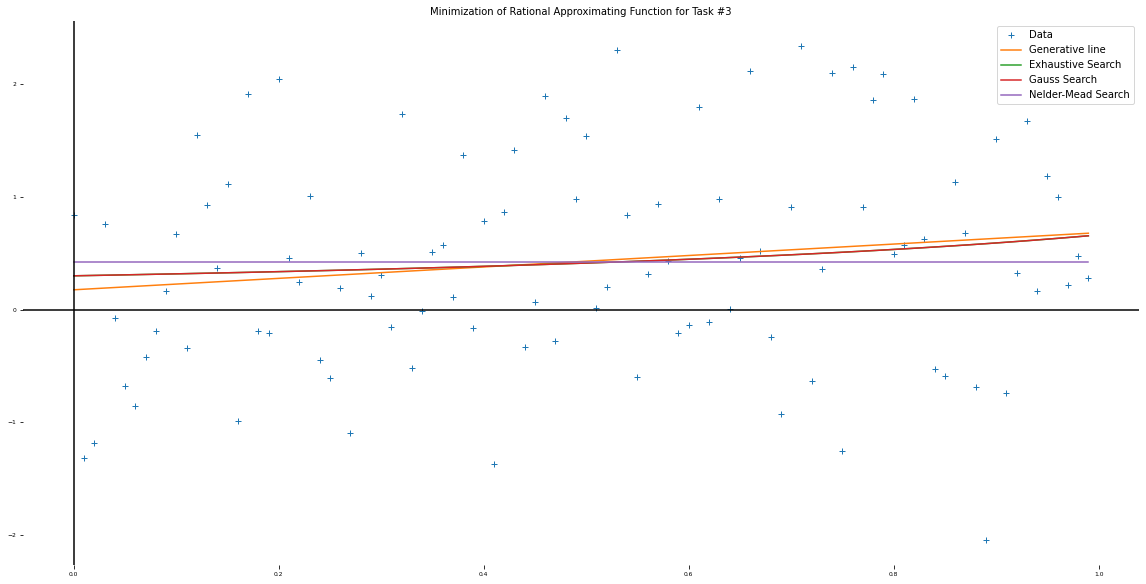

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')
# y_ = [alpha * x_k[k] + beta for k in range(len(x_k))]
plt.plot(x_k, y_, label='Generative line')

y = [rational_approximate(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [rational_approximate(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [rational_approximate(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Minimization of Rational Approximating Function for Task #3', fontsize=10, loc='center')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()

plt.savefig('rational_approx_task2_for_task3.png', dpi = 200, bbox_inches="tight")
files.download('rational_approx_task2_for_task3.png')